In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
import os
import seaborn as sns
from scipy import stats

In [2]:

df = pd.read_excel('laptop_prices.xlsx')
print(df.head())
print(df.info())

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

In [ ]:
# Handle missing values in numerical columns by filling with the median
numerical_columns = ['Ram', 'Weight', 'CPU_freq', 'Price_euros']
for col in numerical_columns:
    if col in df.columns:  # Check if the column exists
        df[col].fillna(df[col].median(), inplace=True)

# Handle missing values in categorical columns by filling with the most frequent (mode) value
categorical_columns = ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']
for col in categorical_columns:
    if col in df.columns:  # Check if the column exists
        mode_value = df[col].mode()  # Get the mode
        if not mode_value.empty:  # Check if the mode is valid
            df[col].fillna(mode_value[0], inplace=True)

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
# Convert Inches to float
df['Inches'] = df['Inches'].astype(float)

# Convert RAM to int
df['Ram'] = df['Ram'].astype(int)

# Convert CPU_freq to float
df['CPU_freq'] = df['CPU_freq'].astype(float)

# Convert Price_euros to float
df['Price_euros'] = df['Price_euros'].astype(float)


In [6]:
# Removing outliers based on Price_euros
Q1 = df['Price_euros'].quantile(0.25)
Q3 = df['Price_euros'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price_euros'] >= (Q1 - 1.5 * IQR)) & (df['Price_euros'] <= (Q3 + 1.5 * IQR))]


In [7]:
# Final check of the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 41 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1052 non-null   object 
 1   Product               1052 non-null   object 
 2   TypeName              1052 non-null   object 
 3   Inches                1052 non-null   float64
 4   Ram                   1052 non-null   int64  
 5   OS                    1052 non-null   object 
 6   Weight                1052 non-null   float64
 7   Price_euros           1052 non-null   float64
 8   Screen                1052 non-null   object 
 9   ScreenW               1052 non-null   int64  
 10  ScreenH               1052 non-null   int64  
 11  Touchscreen           1052 non-null   object 
 12  IPSpanel              1052 non-null   object 
 13  RetinaDisplay         1052 non-null   object 
 14  CPU_company           1052 non-null   object 
 15  CPU_freq              105

Mean Values:
 Price_euros    1499.000000
Ram               8.488593
CPU_freq          2.332167
Weight            2.052810
dtype: float64
Median Values:
 Price_euros    1499.00
Ram               8.00
CPU_freq          2.50
Weight            2.04
dtype: float64
Mode Values:
 Price_euros    1499.0
Ram               8.0
CPU_freq          2.5
Weight            2.2
Name: 0, dtype: float64
       Price_euros          Ram     CPU_freq      Weight
count       1052.0  1052.000000  1052.000000  1052.00000
mean        1499.0     8.488593     2.332167     2.05281
std            0.0     5.216608     0.491994     0.68958
min         1499.0     2.000000     0.900000     0.69000
25%         1499.0     4.000000     2.000000     1.50000
50%         1499.0     8.000000     2.500000     2.04000
75%         1499.0     8.000000     2.700000     2.31000
max         1499.0    64.000000     3.600000     4.70000


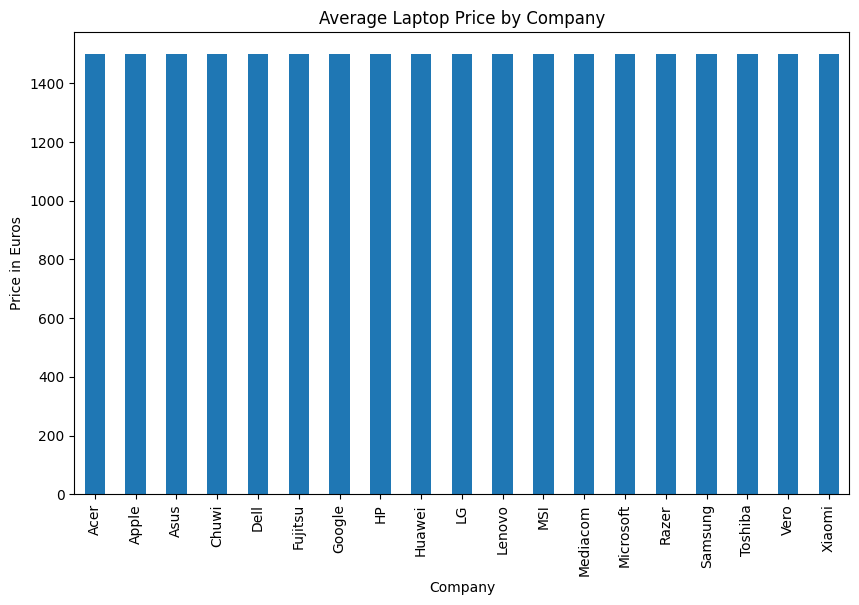

In [8]:
#UNIVARIATE ANALYSIS
# Calculating mean, median, and mode
mean_values = df[['Price_euros', 'Ram', 'CPU_freq', 'Weight']].mean()
median_values = df[['Price_euros', 'Ram', 'CPU_freq', 'Weight']].median()
mode_values = df[['Price_euros', 'Ram', 'CPU_freq', 'Weight']].mode().iloc[0]

# Print the results
print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)

# Summary statistics
print(df[['Price_euros', 'Ram', 'CPU_freq', 'Weight']].describe())

# Mean price by Company
mean_price_by_company = df.groupby('Company')['Price_euros'].mean()

# Visualize the average price by Company
plt.figure(figsize=(10, 6))
mean_price_by_company.plot(kind='bar')
plt.title('Average Laptop Price by Company')
plt.ylabel('Price in Euros')
plt.show()


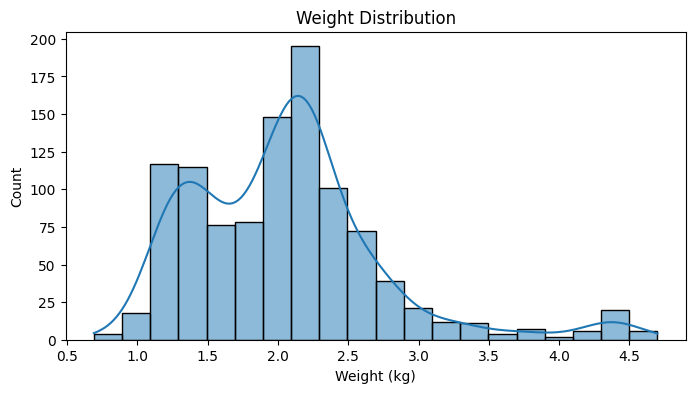

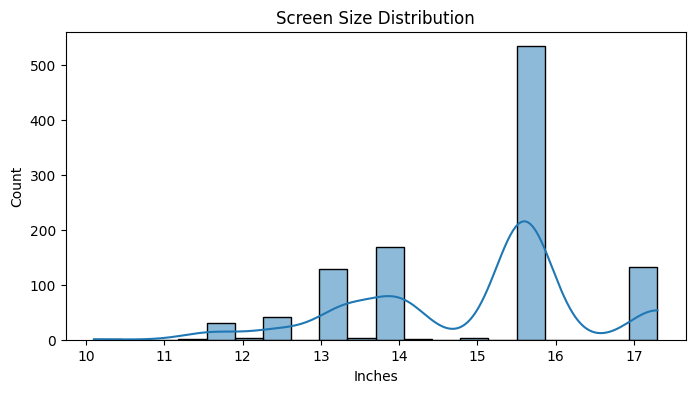

In [9]:
# Weight distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Weight'], bins=20, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.show()

# Inches distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Inches'], bins=20, kde=True)
plt.title('Screen Size Distribution')
plt.xlabel('Inches')
plt.show()


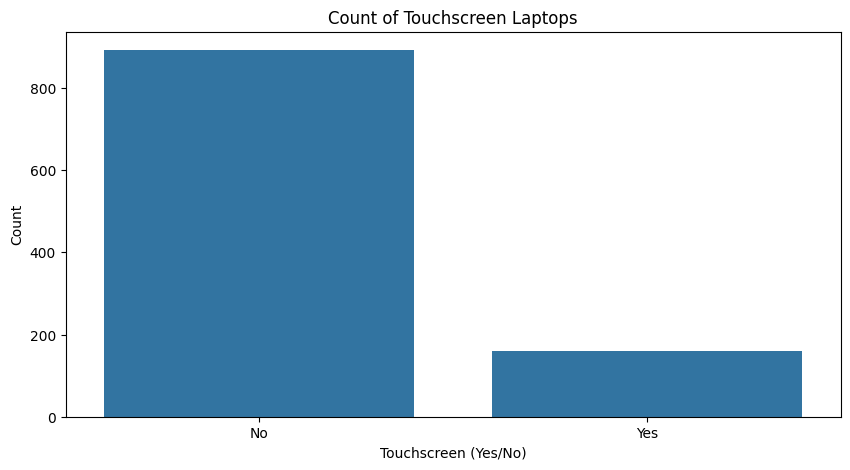

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Touchscreen', data=df)
plt.title('Count of Touchscreen Laptops')
plt.xlabel('Touchscreen (Yes/No)')
plt.ylabel('Count')
plt.show()


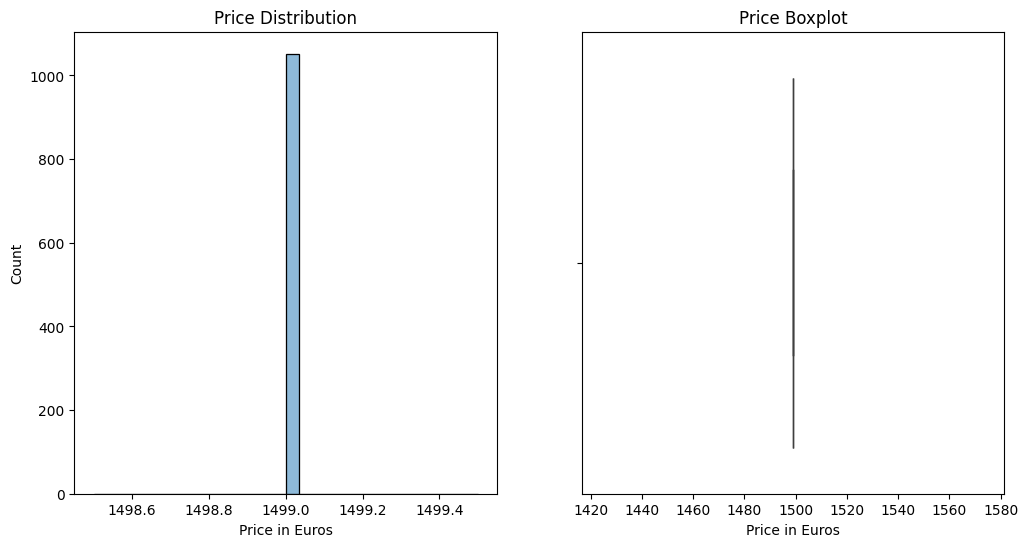

In [11]:
# Plotting histogram and boxplot for Price_euros
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Price_euros'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price in Euros')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price_euros'])
plt.title('Price Boxplot')
plt.xlabel('Price in Euros')
plt.show()

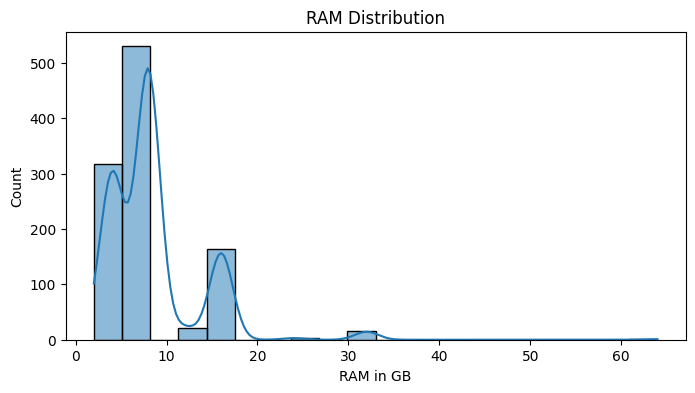

In [12]:
# Plotting histogram for RAM
plt.figure(figsize=(8, 4))
sns.histplot(df['Ram'], bins=20, kde=True)
plt.title('RAM Distribution')
plt.xlabel('RAM in GB')
plt.show()


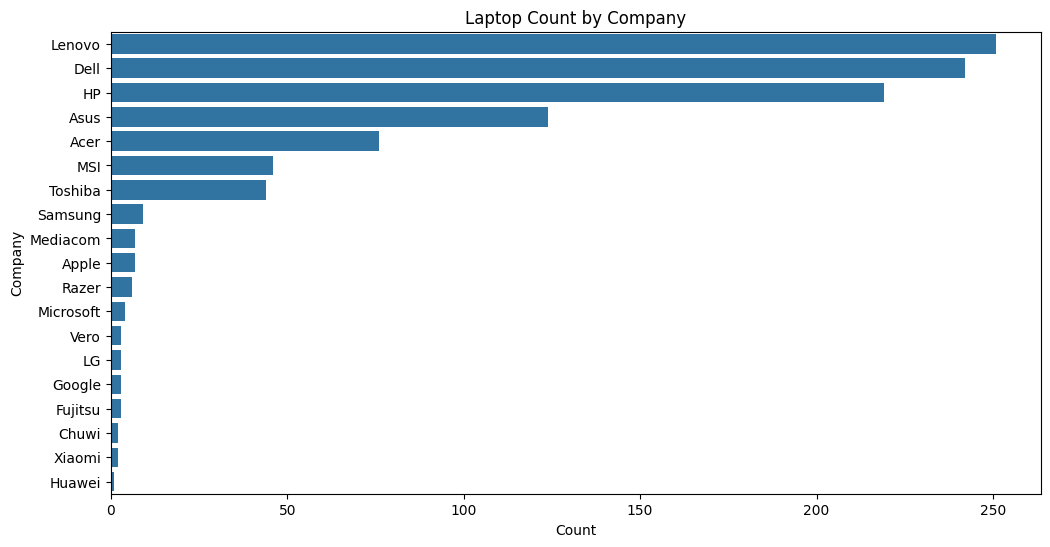

In [13]:
# Bar plot for Company frequency
plt.figure(figsize=(12, 6))
sns.countplot(y='Company', data=df, order=df['Company'].value_counts().index)
plt.title('Laptop Count by Company')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()


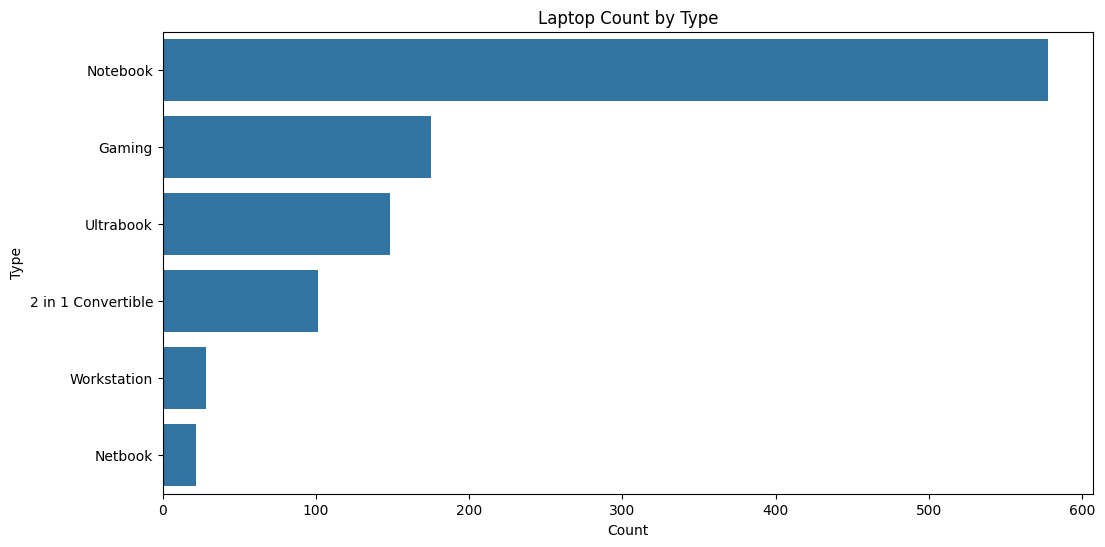

In [14]:
# Bar plot for TypeName frequency
plt.figure(figsize=(12, 6))
sns.countplot(y='TypeName', data=df, order=df['TypeName'].value_counts().index)
plt.title('Laptop Count by Type')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

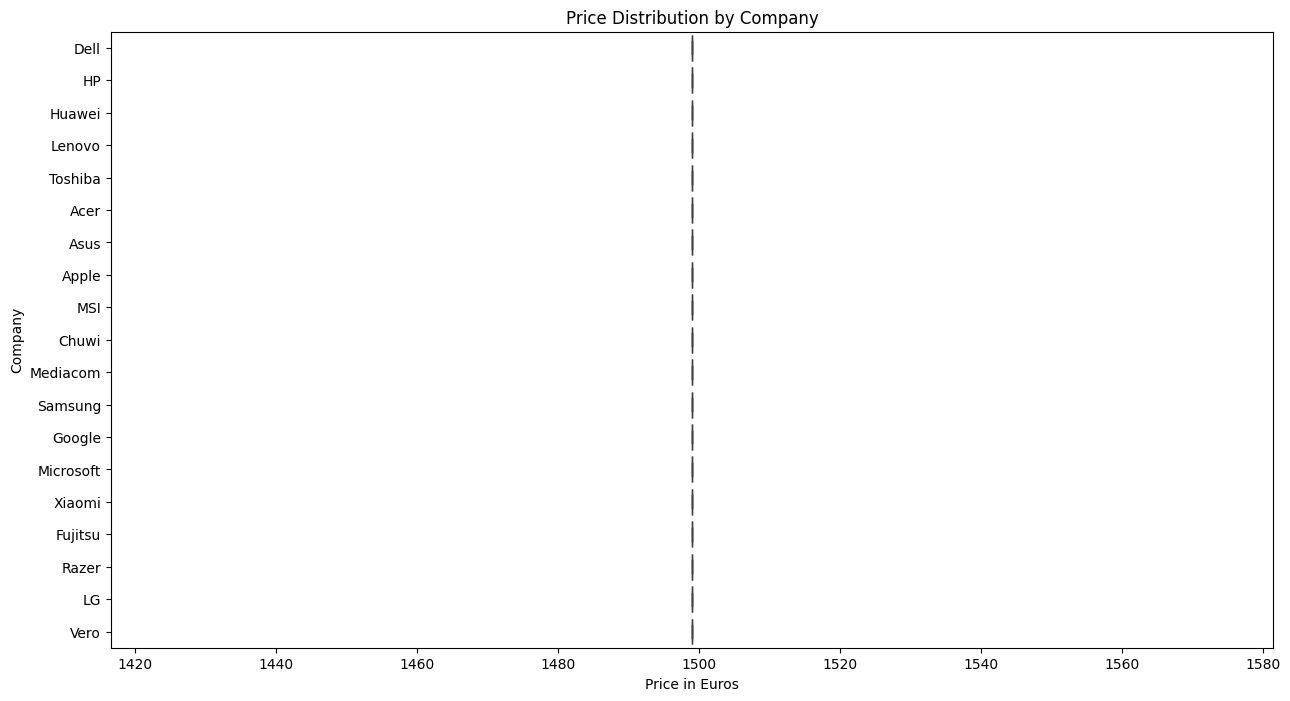

In [15]:
#MULTIVARIATE ANALYSIS
# Boxplot for Price by Company
plt.figure(figsize=(15, 8))
sns.boxplot(x='Price_euros', y='Company', data=df)
plt.title('Price Distribution by Company')
plt.xlabel('Price in Euros')
plt.ylabel('Company')
plt.show()


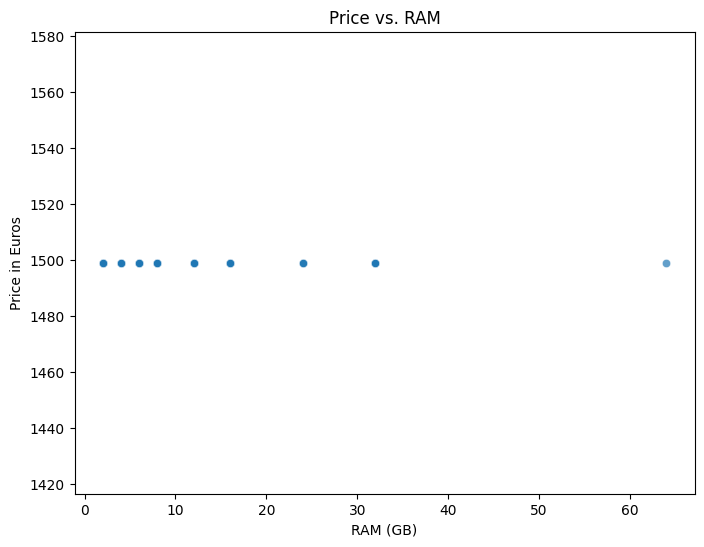

In [16]:
# Scatter plot for Price vs. RAM
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ram', y='Price_euros', data=df, alpha=0.7)
plt.title('Price vs. RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price in Euros')
plt.show()


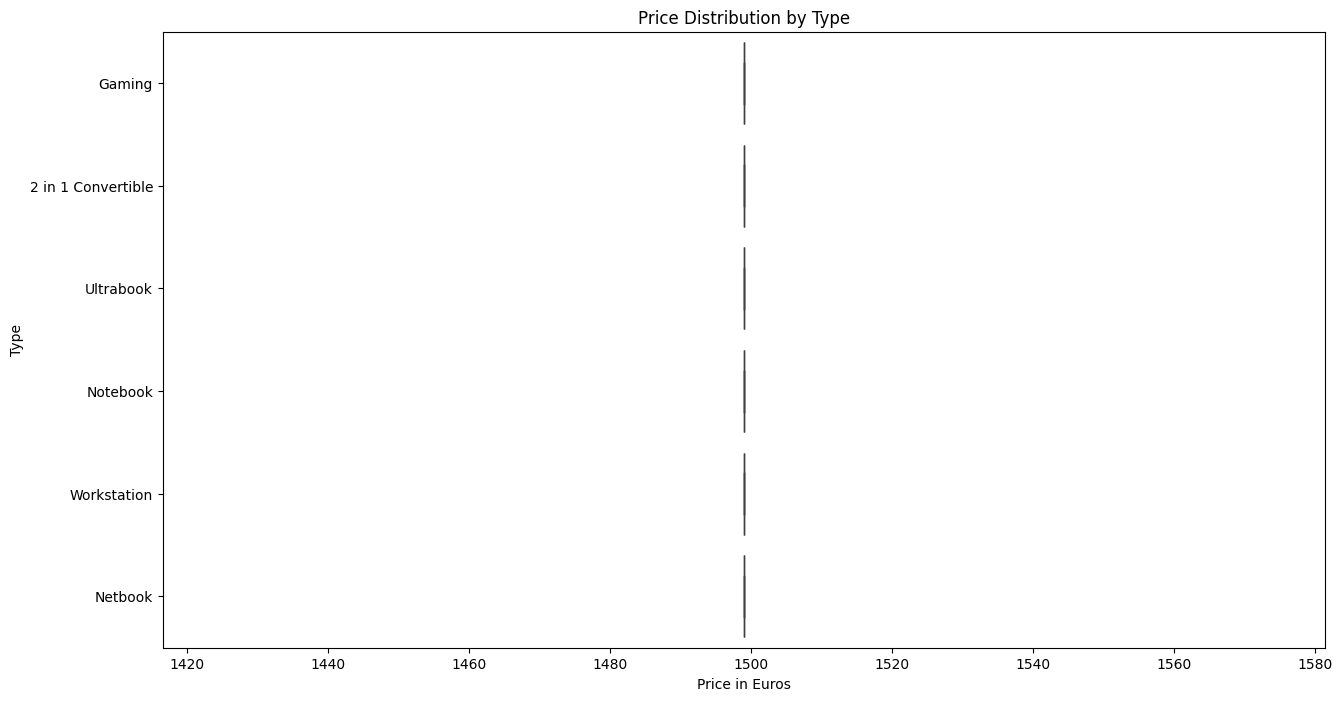

In [17]:
# Boxplot for Price by TypeName
plt.figure(figsize=(15, 8))
sns.boxplot(x='Price_euros', y='TypeName', data=df)
plt.title('Price Distribution by Type')
plt.xlabel('Price in Euros')
plt.ylabel('Type')
plt.show()


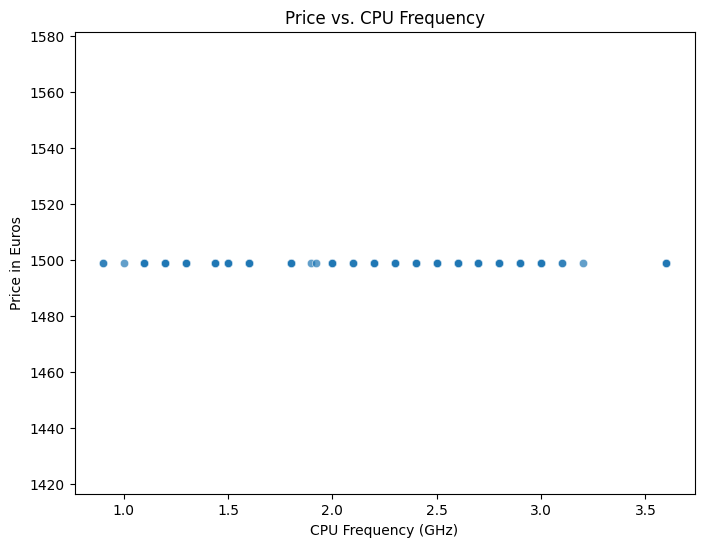

In [18]:
# Scatter plot for Price vs. CPU Frequency
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPU_freq', y='Price_euros', data=df, alpha=0.7)
plt.title('Price vs. CPU Frequency')
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Price in Euros')
plt.show()


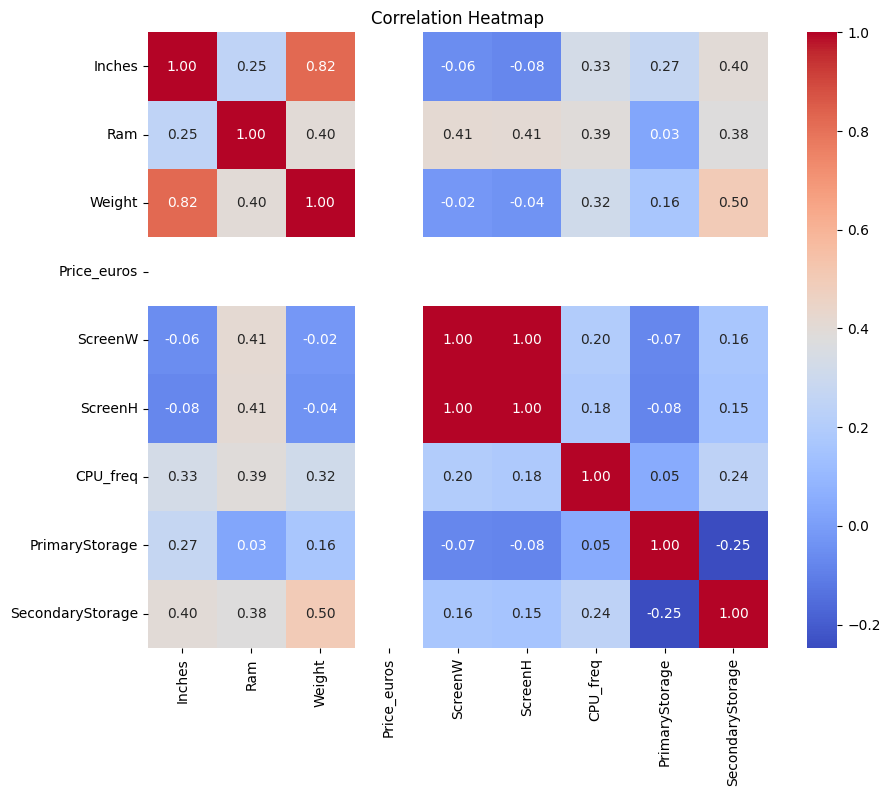

In [19]:

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Include only numeric data types

# Generate the correlation matrix
corr = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



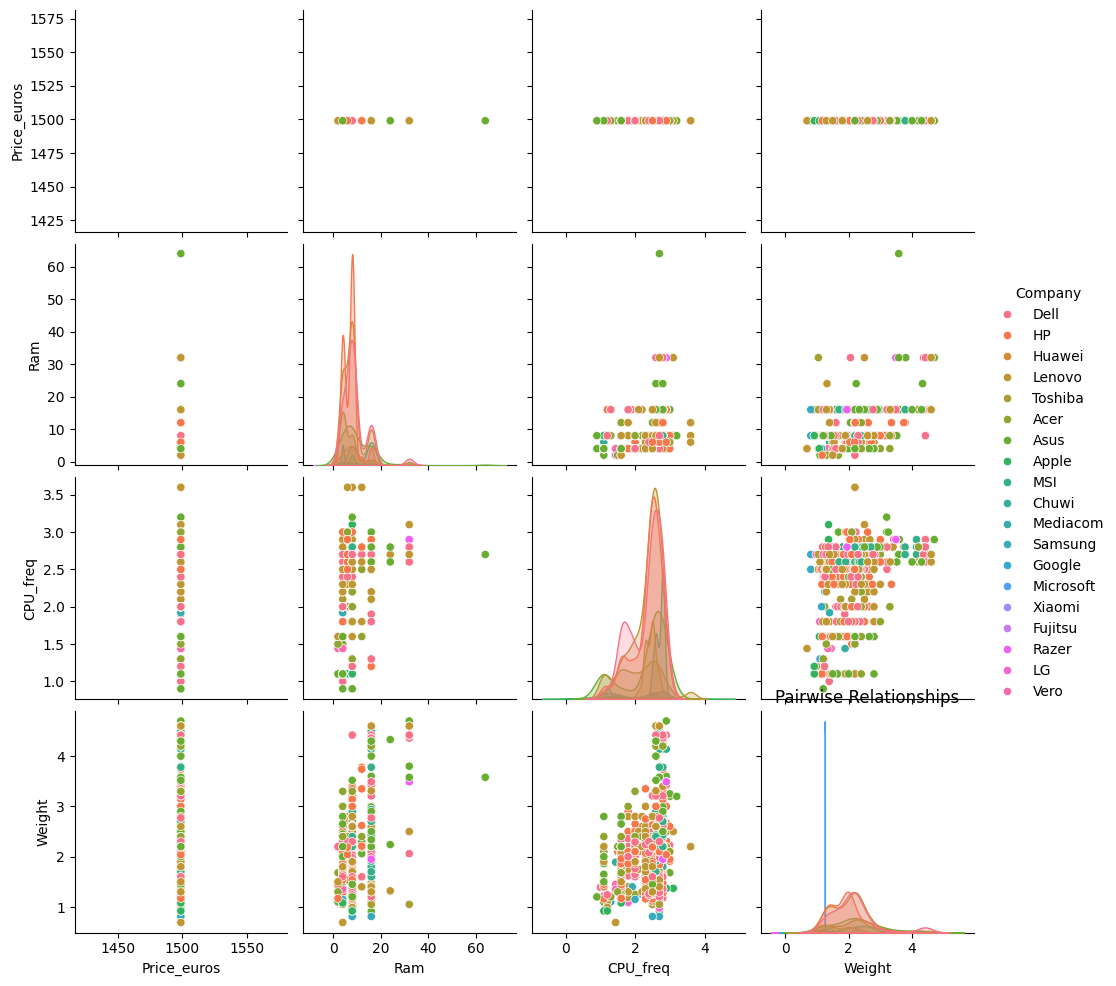

In [20]:
sns.pairplot(df, vars=['Price_euros', 'Ram', 'CPU_freq', 'Weight'], hue='Company')
plt.title('Pairwise Relationships')
plt.show()


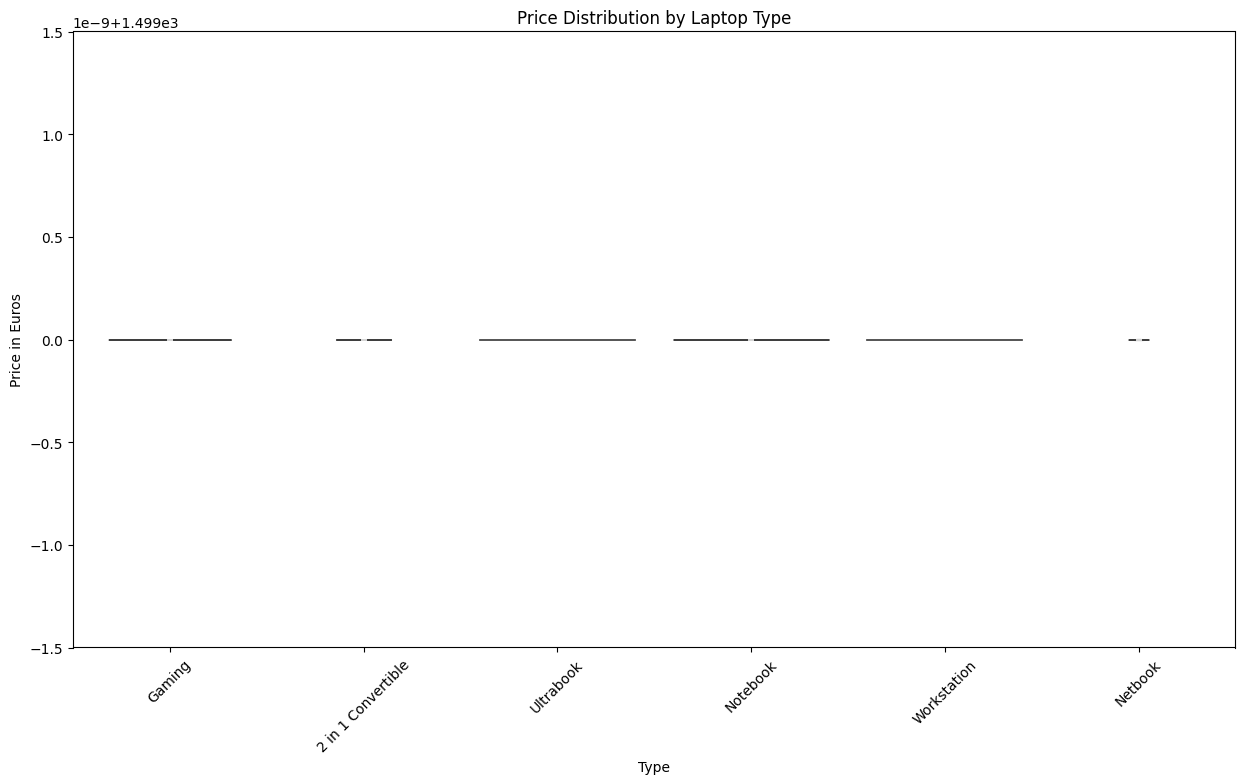

In [21]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='TypeName', y='Price_euros', data=df)
plt.title('Price Distribution by Laptop Type')
plt.xlabel('Type')
plt.ylabel('Price in Euros')
plt.xticks(rotation=45)
plt.show()


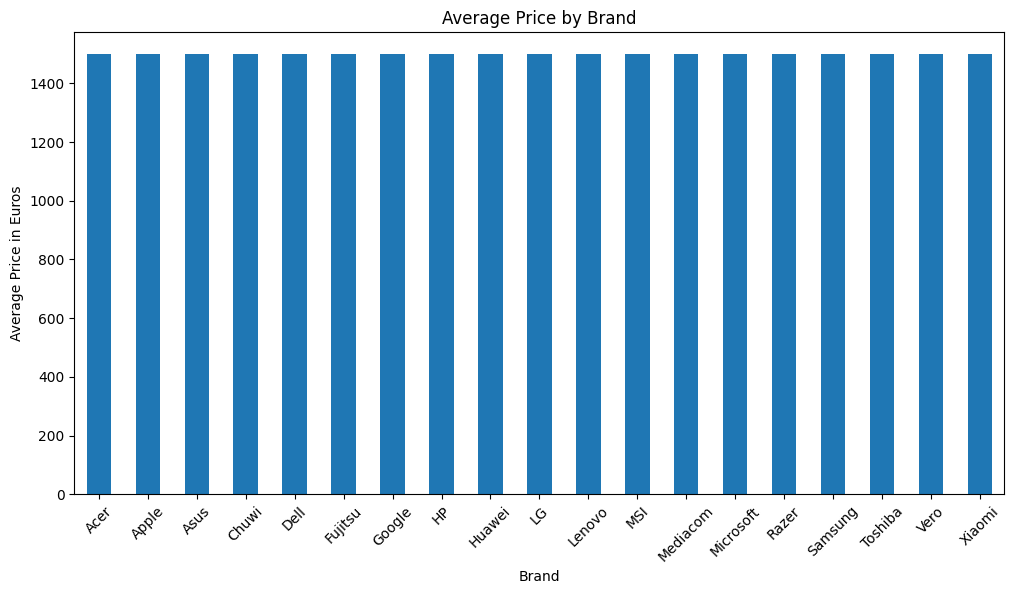

In [22]:
avg_price_by_brand = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
avg_price_by_brand.plot(kind='bar', figsize=(12, 6))
plt.title('Average Price by Brand')
plt.ylabel('Average Price in Euros')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()
